In [1]:
import os, cv, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
dataset_path = 'asl_dataset'
dataset_list = os.listdir(dataset_path)
print(dataset_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'test_set', 'training_set', 'U', 'V', 'validation_set', 'W', 'X', 'Y', 'Z']


In [ ]:
!pip install Augmentor

In [3]:
import Augmentor

training_path = dataset_path
for i in dataset_list:
    p = Augmentor.Pipeline(os.path.join(training_path, i))
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)
    p.sample(300)

In [45]:
train_set = {}
validation_set = {}
test_set = {}

for cat in os.listdir(dataset_path):
    cat_dir = os.path.join(dataset_path, cat)
    cat_files = os.listdir(cat_dir)
    train_list, test_list = train_test_split(cat_files, test_size=0.3)
    validation_list, test_list = train_test_split(test_list, test_size=0.5)
    
    train_set[cat] = train_list
    test_set[cat] = test_list
    validation_set[cat] = validation_list

In [20]:
for cat in tqdm(train_set.keys()):
    cat_dir = os.path.join(dataset_path, 'training_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in train_set[cat]:
        src = os.path.join(dataset_path, cat, file)
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 39/39 [00:09<00:00,  4.00it/s]


In [21]:
for cat in tqdm(validation_set.keys()):
    cat_dir = os.path.join(dataset_path, 'validation_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in validation_set[cat]:
        src = os.path.join(dataset_path, cat, file)
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 39/39 [00:02<00:00, 17.20it/s]


In [22]:
for cat in tqdm(test_set.keys()):
    cat_dir = os.path.join(dataset_path, 'test_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in test_set[cat]:
        src = os.path.join(dataset_path, cat, file)
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 39/39 [00:02<00:00, 16.92it/s]


In [23]:
for i in train_set.keys():
    print(i+ "- Training size: "+ str(len(train_set[i]))+ " Validation set: "+ str(len(validation_set[i]))+ " Test set: "+ str(len(test_set[i])))

0- Training size: 143 Validation set: 31 Test set: 31
1- Training size: 144 Validation set: 31 Test set: 31
2- Training size: 144 Validation set: 31 Test set: 31
3- Training size: 144 Validation set: 31 Test set: 31
4- Training size: 144 Validation set: 31 Test set: 32
5- Training size: 144 Validation set: 31 Test set: 32
6- Training size: 144 Validation set: 31 Test set: 32
7- Training size: 144 Validation set: 31 Test set: 31
8- Training size: 145 Validation set: 31 Test set: 32
9- Training size: 142 Validation set: 31 Test set: 31
A- Training size: 210 Validation set: 45 Test set: 45
B- Training size: 210 Validation set: 45 Test set: 45
C- Training size: 210 Validation set: 45 Test set: 45
D- Training size: 210 Validation set: 45 Test set: 45
del- Training size: 210 Validation set: 45 Test set: 45
E- Training size: 210 Validation set: 45 Test set: 45
F- Training size: 210 Validation set: 45 Test set: 45
G- Training size: 210 Validation set: 45 Test set: 45
H- Training size: 210 Vali

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_data = train_datagen.flow_from_directory(os.path.join(dataset_path, 'training_set'),
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(dataset_path, 'validation_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(dataset_path, 'test_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7528 images belonging to 39 classes.
Found 1615 images belonging to 39 classes.
Found 1619 images belonging to 39 classes.


In [4]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation= 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))

classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 39, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
history = classifier.fit_generator(training_data,
                                  steps_per_epoch= math.ceil(training_data.n/training_data.batch_size),
                                  epochs=100,
                                  validation_data= validation_data,
                                  validation_steps= math.ceil(validation_data.n/validation_data.batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
236/236 [==============================] - 71s 301ms/step - loss: 3.4671 - acc: 0.0575 - val_loss: 3.0251 - val_acc: 0.1517
Epoch 2/100
236/236 [==============================] - 77s 325ms/step - loss: 2.8242 - acc: 0.1903 - val_loss: 2.1424 - val_acc: 0.3926
Epoch 3/100
236/236 [==============================] - 64s 272ms/step - loss: 2.2941 - acc: 0.3145 - val_loss: 1.6517 - val_acc: 0.5201
Epoch 4/100
236/236 [==============================] - 64s 269ms/step - loss: 2.0014 - acc: 0.3849 - val_loss: 1.4580 - val_acc: 0.5752
Epoch 5/100
236/236 [==============================] - 65s 273ms/step - loss: 1.7548 - acc: 0.4415 - val_loss: 1.1507 - val_acc: 0.6533
Epoch 6/100
236/236 [==============================] - 59s 248ms/step - loss: 1.5679 - acc: 0.4967 - val_loss: 1.0935 - val_acc: 0.6743
Epoch 7/100
236/236 [==============================] - 51s 218ms/step - loss: 1.4626 - acc: 0.5302 - val_loss: 0.9306 - val_acc: 0.7133


Epoch 59/100
236/236 [==============================] - 49s 209ms/step - loss: 0.3955 - acc: 0.8647 - val_loss: 0.1786 - val_acc: 0.9424
Epoch 60/100
236/236 [==============================] - 49s 208ms/step - loss: 0.3992 - acc: 0.8603 - val_loss: 0.1852 - val_acc: 0.9350
Epoch 61/100
236/236 [==============================] - 49s 208ms/step - loss: 0.3978 - acc: 0.8596 - val_loss: 0.2136 - val_acc: 0.9238
Epoch 62/100
236/236 [==============================] - 49s 210ms/step - loss: 0.3886 - acc: 0.8663 - val_loss: 0.1798 - val_acc: 0.9381
Epoch 63/100
236/236 [==============================] - 49s 209ms/step - loss: 0.4116 - acc: 0.8588 - val_loss: 0.1797 - val_acc: 0.9381
Epoch 64/100
236/236 [==============================] - 49s 210ms/step - loss: 0.3787 - acc: 0.8716 - val_loss: 0.1750 - val_acc: 0.9387
Epoch 65/100
236/236 [==============================] - 49s 209ms/step - loss: 0.3720 - acc: 0.8675 - val_loss: 0.1624 - val_acc: 0.9474
Epoch 66/100
236/236 [===================

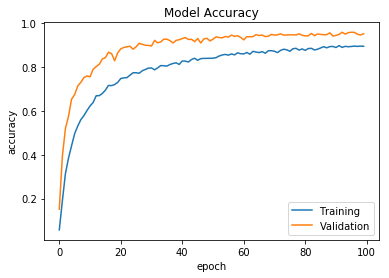

In [22]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])


In [9]:
test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(test_accuracy))

Accuracy on test set : 0.9549104385423101


In [10]:
validation_loss, validation_accuracy = classifier.evaluate_generator(validation_data, math.ceil(validation_data.n / validation_data.batch_size))
print("Accuracy on validation set: {}".format(validation_accuracy))

Accuracy on validation set: 0.9517027864884297


In [11]:
train_loss, training_accuracy = classifier.evaluate_generator(training_data, math.ceil(training_data.n / training_data.batch_size))
print("Accuracy on training set: {}".format(training_accuracy))

Accuracy on training set: 0.9905685441020191


In [15]:
import joblib
joblib.dump(history, 'model1.pkl')

['model1.pkl']

In [41]:
import joblib
history_reloaded = joblib.load('model1.pkl')

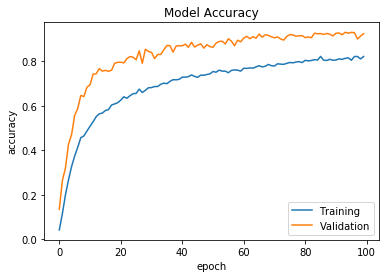

In [3]:
plt.plot(history_reloaded.history['acc'])
plt.plot(history_reloaded.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])


In [62]:
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
sentence = ""
cat_dir = "Predict"
cat_files = os.listdir(cat_dir)

for i in cat_files:
    img = load_img(os.path.join(cat_dir, i), target_size=(64,64))
    test_image = image.img_to_array(img)
    test_image = test_image / 255
    test_image = np.expand_dims(test_image, axis = 0)
    images = np.vstack([test_image])
    classes = classifier.predict(images, batch_size=10)
    print(class_list[np.argmax(classes)])
    

print(sentence)

G
K
D
del
K
K
N
Z
T
N
P



In [44]:
class_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']